In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('text', usetex=True)

def plot_comparison_boxplot(df1, df2, group_column, metric_column, ordering=['lstm', 'deepar', 'tft', 'nhits', 'tcn', 'transformer'], show_outliers=False, df_labels=['DF1', 'DF2'], exclude_groups=[], ytick_arr=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]):
    """
    Plots comparison box plots for each group from two DataFrames.

    Parameters:
    df1 (pd.DataFrame): The first input DataFrame.
    df2 (pd.DataFrame): The second input DataFrame.
    group_column (str): The column name to group by.
    metric_column (str): The column name of the metric.
    remove_outliers (bool): Whether to remove outliers. Default is True.

    Returns:
    None: The function will display the plot.
    """
    if group_column not in df1.columns or group_column not in df2.columns:
        raise ValueError(f"Group column '{group_column}' does not exist in one or both DataFrames.")
    
    if metric_column not in df1.columns or metric_column not in df2.columns:
        raise ValueError(f"Metric column '{metric_column}' does not exist in one or both DataFrames.")
    
    # Add a column to distinguish the DataFrames
    df1['DataFrame'] = df_labels[0]
    df2['DataFrame'] = df_labels[1]

    # Combine the DataFrames
    combined_df = pd.concat([df1, df2])
    
    # Exclude specific groups if needed
    combined_df = combined_df[~combined_df[group_column].isin(exclude_groups)]
    ordering = [group for group in ordering if group not in exclude_groups]
    
    # # Calculate the minimum values for each group
    # min_values_df = combined_df.groupby(group_column)[metric_column].min().reset_index()
    # min_values_df.columns = [group_column, f"min_{metric_column}"]
    
    # # Determine the order of the groups based on the minimum values
    # ordered_groups = min_values_df.sort_values(by=f"min_{metric_column}")[group_column]
    
    # Set the aesthetic style of the plots
    sns.set_theme(style="whitegrid")
    
    # Create the box plot with ordered groups
    fig = plt.figure(figsize=(14, 10))
    ax = sns.boxplot(
        data=combined_df,
        x=group_column,
        y=metric_column,
        order=ordering, # For ordering
        hue="DataFrame",
        palette={df_labels[0]: "red", df_labels[1]: "blue"},
        linewidth=1.5,     # Thinner line width for the outlines
        fliersize=3,       # Size of the outliers
        showfliers=show_outliers
    )
    
    # Add dashed vertical lines between groups
    xticks = ax.get_xticks()
    for i in range(len(xticks) - 1):
        ax.axvline(x=(xticks[i] + xticks[i + 1]) / 2, color='black', linestyle='dashed', alpha=0.4)
    
    # Remove legend title
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, fontsize=30)
    
    # Set the LaTeX rendering and specify the use of bold fonts
    plt.rcParams.update({
        'text.usetex': True,
        'font.family': 'serif',
        'font.serif': 'cmu',
        #'text.latex.preamble': r'\usepackage{bm} \boldmath'
    })
        
    # Add a title and labels with larger fonts for presentation
    #plt.title(f'Boxplot of {metric_column} grouped by {group_column}', fontsize=20, fontweight='bold')
    plt.xlabel(r'\textbf{' + group_column + r'}', fontsize=40, fontweight='bold')
    plt.ylabel(r'\textbf{' + metric_column + r'}', fontsize=40, fontweight='bold')
    
    # Customize the tick parameters
    plt.xticks(rotation=45, fontsize=40)
    plt.yticks(fontsize=40, ticks=ytick_arr)
    
    # Add grid lines for better readability
    ax.yaxis.grid(True)
    
    # Add border around the plotting area
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

    # Remove top and right spines for a cleaner look
    sns.despine(trim=True, left=True)

    # Show the plot
    plt.tight_layout()
    fig.savefig("comparison_boxplot.pdf", format='pdf', dpi=300)
    plt.show()

def plot_boxplots(df, group_column, metric_column, ordering=['lstm', 'deepar', 'tft', 'nhits', 'tcn', 'transformer'], show_outliers=False):
    """
    Creates enhanced box plots with rounded corners for the given DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    type_col (str): The name of the column to group by for the box plots.
    metric_col (str): The name of the column to use for the metric in the box plots.
    """
    if group_column not in df.columns:
        raise ValueError(f"Group column '{group_column}' does not exist in the DataFrame.")
    
    if metric_column not in df.columns:
        raise ValueError(f"Metric column '{metric_column}' does not exist in the DataFrame.")
    
    # Calculate the minimum values for each group
    min_values_df = df.groupby(group_column)[metric_column].min().reset_index()
    min_values_df.columns = [group_column, f"min_{metric_column}"]
    
    # Determine the order of the groups based on the minimum values
    ordered_groups = min_values_df.sort_values(by=f"min_{metric_column}")[group_column]
    
    # Set the aesthetic style of the plots
    sns.set_theme(style="whitegrid")
    
    # Create the box plot with ordered groups
    plt.figure(figsize=(14, 10))
    ax = sns.boxplot(
        data=df,
        x=group_column,
        y=metric_column,
        order=ordering, # For ordering
        palette="bright",  # Brighter color palette
        linewidth=1.5,     # Thinner line width for the outlines
        fliersize=3,       # Size of the outliers
        showfliers=show_outliers
    )
    
    # Add a title and labels with larger fonts for presentation
    plt.title(f'Boxplot of {metric_column} grouped by {group_column}', fontsize=20, fontweight='bold')
    plt.xlabel(group_column, fontsize=18, fontweight='bold')
    plt.ylabel(metric_column, fontsize=18, fontweight='bold')
    
    # Customize the tick parameters
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)
    
    # Add grid lines for better readability
    ax.yaxis.grid(True)
    
    # Remove top and right spines for a cleaner look
    sns.despine(trim=True, left=True)

    # Show the plot
    plt.tight_layout()
    plt.show()

def get_min_values_by_group(df, group_column, metric_column):
    """
    Returns the minimum values for the given metric for each group in the DataFrame,
    ordered in ascending order.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    group_column (str): The column name to group by.
    metric_column (str): The column name of the metric. Default is "metric".

    Returns:
    pd.DataFrame: A DataFrame with the minimum values for the metric for each group, ordered ascending.
    """
    if group_column not in df.columns:
        raise ValueError(f"Group column '{group_column}' does not exist in the DataFrame.")
    
    if metric_column not in df.columns:
        raise ValueError(f"Metric column '{metric_column}' does not exist in the DataFrame.")
    
    min_values_df = df.groupby(group_column)[metric_column].min().reset_index()
    min_values_df.columns = [group_column, f"min_{metric_column}"]
    
    # Order the result by the minimum values in ascending order
    min_values_df = min_values_df.sort_values(by=f"min_{metric_column}")
    
    return min_values_df

def get_median_values_by_group(df, group_column, metric_column):
    """
    Returns the median values for the given metric for each group in the DataFrame,
    ordered in ascending order.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    group_column (str): The column name to group by.
    metric_column (str): The column name of the metric. Default is "metric".

    Returns:
    pd.DataFrame: A DataFrame with the median values for the metric for each group, ordered ascending.
    """
    if group_column not in df.columns:
        raise ValueError(f"Group column '{group_column}' does not exist in the DataFrame.")
    
    if metric_column not in df.columns:
        raise ValueError(f"Metric column '{metric_column}' does not exist in the DataFrame.")
    
    median_values_df = df.groupby(group_column)[metric_column].median().reset_index()
    median_values_df.columns = [group_column, f"median_{metric_column}"]
    
    # Order the result by the median values in ascending order
    median_values_df = median_values_df.sort_values(by=f"median_{metric_column}")
    
    return median_values_df


def find_min_rows_by_group(df, group_column, metric_column):
    """
    Finds the rows with the minimum value of the specified metric for each group.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    group_column (str): The column name to group by.
    metric_column (str): The column name of the metric.

    Returns:
    pd.DataFrame: A DataFrame containing the rows with the minimum values for the metric for each group.
    """
    if group_column not in df.columns:
        raise ValueError(f"Group column '{group_column}' does not exist in the DataFrame.")
    
    if metric_column not in df.columns:
        raise ValueError(f"Metric column '{metric_column}' does not exist in the DataFrame.")
    
    # Step 1: Find the minimum value for each group
    min_values_df = df.groupby(group_column)[metric_column].min().reset_index()
    min_values_df.columns = [group_column, f"min_{metric_column}"]

    # Step 2: Merge the original DataFrame with the min_values_df to find the rows with the minimum values
    merged_df = pd.merge(df, min_values_df, how='inner', on=group_column)

    # Step 3: Filter the rows where the metric_column matches the min value for each group
    result_df = merged_df[merged_df[metric_column] == merged_df[f"min_{metric_column}"]]

    return result_df

def find_median_rows_by_group(df, group_column, metric_column):
    """
    Finds the rows with the median value of the specified metric for each group.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    group_column (str): The column name to group by.
    metric_column (str): The column name of the metric.

    Returns:
    pd.DataFrame: A DataFrame containing the rows with the median values for the metric for each group.
    """
    if group_column not in df.columns:
        raise ValueError(f"Group column '{group_column}' does not exist in the DataFrame.")
    
    if metric_column not in df.columns:
        raise ValueError(f"Metric column '{metric_column}' does not exist in the DataFrame.")
    
    # Step 1: Find the median value for each group
    median_values_df = df.groupby(group_column)[metric_column].median().reset_index()
    median_values_df.columns = [group_column, f"median_{metric_column}"]

    # Step 2: Merge the original DataFrame with the median_values_df to find the rows with the median values
    merged_df = pd.merge(df, median_values_df, how='inner', on=group_column)

    # Step 3: Filter the rows where the metric_column matches the median value for each group
    result_df = merged_df[np.isclose(merged_df[metric_column], merged_df[f"median_{metric_column}"], atol=0)]

    return result_df

def prepare_df(df):
    prepared_df = df.copy()
    
    rename_dict = {
        'lstm' : r'LSTM',
        'deepar' : r'DeepAR',
        'tft' : r'TFT',
        'nhits' : r'N-HiTS',
        'tcn' : r'TCN',
        'transformer' : r'Transformer'
    }
    
    columns_dict = {
        'model_type' : 'Model Type',
        'test_MeanSquaredError' : 'Test MSE',
        'test_MeanAbsolutePercentageError' : 'Test MAPE',
        'test_MeanSquaredErrorHighChangeIntervals' : 'Test MSE at Peak Events',
    }
    
    prepared_df['model_type'] = prepared_df['model_type'].replace(rename_dict)
    prepared_df.rename(columns=columns_dict, inplace=True)
    
    return prepared_df

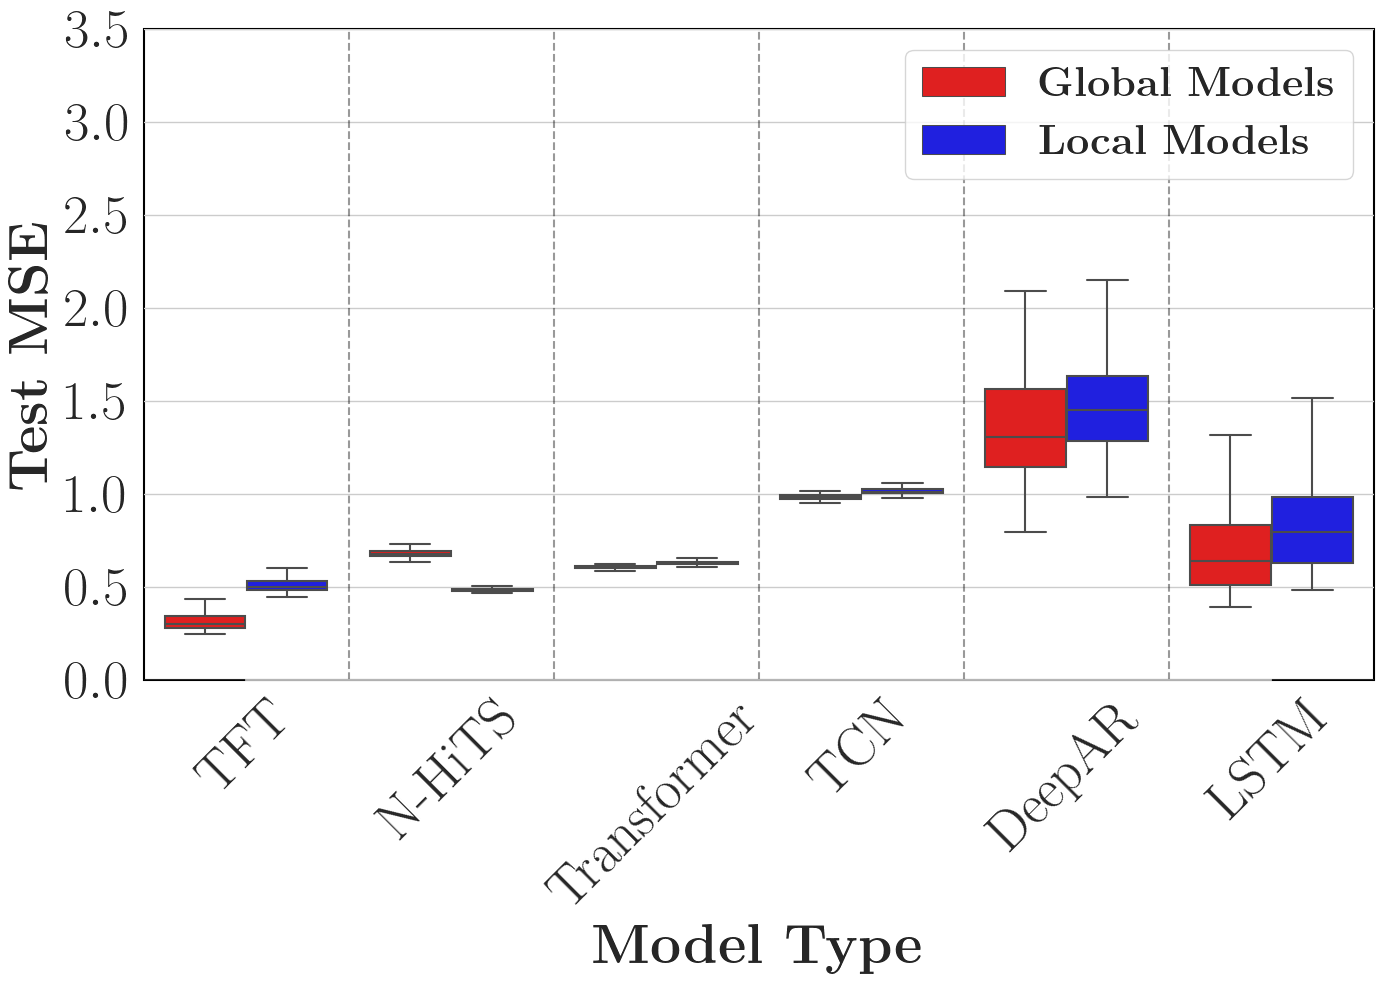

In [2]:
global_experiment_results = pd.read_csv("results_global_inferences_v2.1.csv")
local_experiment_results = pd.read_csv("results_local_inferences_v2.1.csv")

plot_comparison_boxplot(
    prepare_df(global_experiment_results),
    prepare_df(local_experiment_results),
    group_column='Model Type',
    metric_column='Test MSE',
    ordering=[r'TFT', r'N-HiTS', r'Transformer', r'TCN', r'DeepAR', r'LSTM'],
    show_outliers=False,
    df_labels=[r'\textbf{Global Models}', r'\textbf{Local Models}']
)

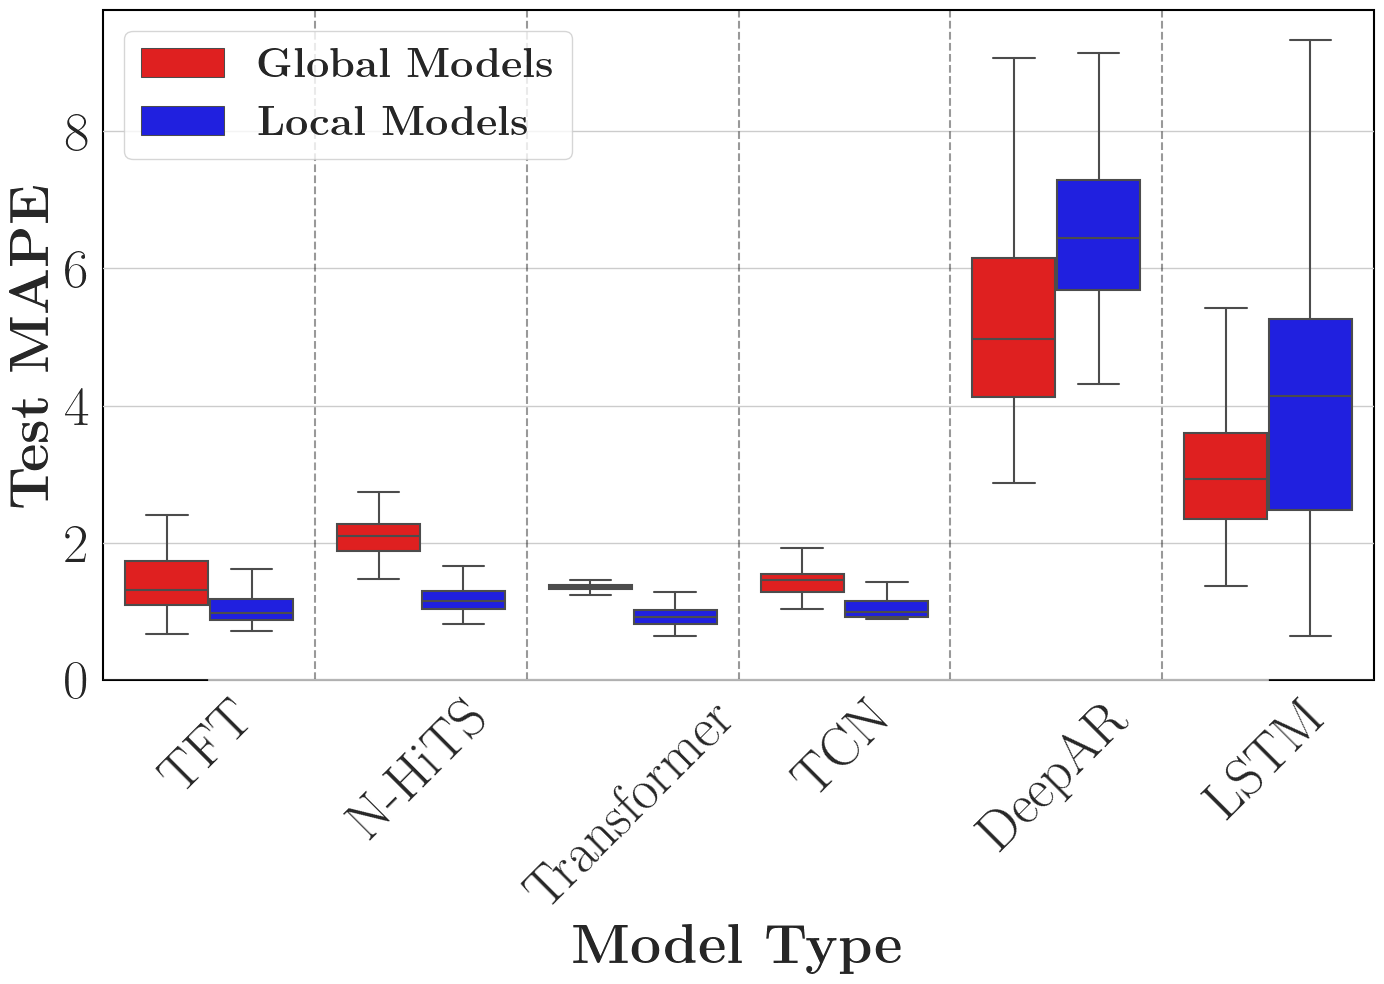

In [3]:
global_experiment_results = pd.read_csv("results_global_inferences_v2.1.csv")
local_experiment_results = pd.read_csv("results_local_inferences_v2.1.csv")

plot_comparison_boxplot(
    prepare_df(global_experiment_results),
    prepare_df(local_experiment_results),
    group_column='Model Type',
    metric_column='Test MAPE',
    ordering=[r'TFT', r'N-HiTS', r'Transformer', r'TCN', r'DeepAR', r'LSTM'],
    show_outliers=False,
    df_labels=[r'\textbf{Global Models}', r'\textbf{Local Models}'],
    ytick_arr=[0.0, 2.0, 4.0, 6.0, 8.0]
)

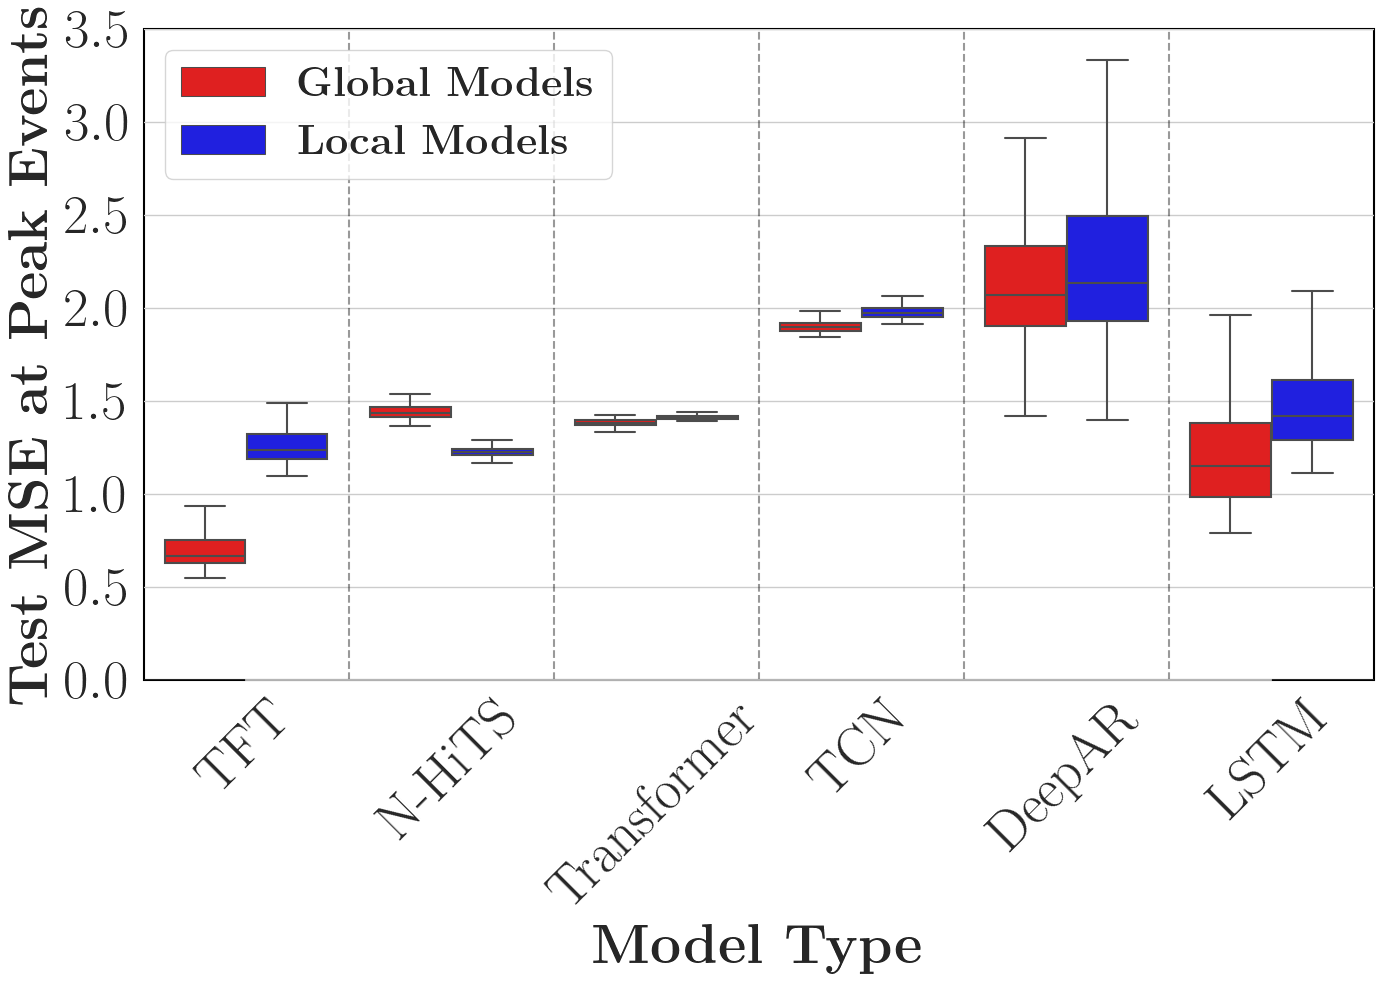

In [4]:
global_experiment_results = pd.read_csv("results_global_inferences_v2.1.csv")
local_experiment_results = pd.read_csv("results_local_inferences_v2.1.csv")

plot_comparison_boxplot(
    prepare_df(global_experiment_results),
    prepare_df(local_experiment_results),
    group_column='Model Type',
    metric_column='Test MSE at Peak Events',
    ordering=[r'TFT', r'N-HiTS', r'Transformer', r'TCN', r'DeepAR', r'LSTM'],
    show_outliers=False,
    df_labels=[r'\textbf{Global Models}', r'\textbf{Local Models}']
)

In [5]:
print("Global Models")
display(get_median_values_by_group(global_experiment_results, 'model_type', 'test_MeanSquaredError').set_index('model_type'))

print("Local Models")
display(get_median_values_by_group(local_experiment_results, 'model_type', 'test_MeanSquaredError').set_index('model_type'))

Global Models


,median_test_MeanSquaredError
model_type,
tft,0.299607
transformer,0.607049
lstm,0.638454
nhits,0.679222
tcn,0.982750
deepar,1.307265


Local Models


,median_test_MeanSquaredError
model_type,
nhits,0.480811
tft,0.498988
transformer,0.629159
lstm,0.793847
tcn,1.012759
deepar,1.448991


In [6]:
global_experiment_results.columns

Index(['name', 'model_type', 'test_MeanSquaredError',
       'test_MeanAbsolutePercentageError',
       'test_MeanSquaredErrorHighChangeIntervals',
       'Mean test time per sample (ms)'],
      dtype='object')

In [7]:
print("Global Models avg. test time per sample (ms)")
display(global_experiment_results.groupby("model_type")["Mean test time per sample (ms)"].mean())

print("\nLocal Models avg. test time per sample (ms)")
display(local_experiment_results.groupby("model_type")["Mean test time per sample (ms)"].mean())

Global Models avg. test time per sample (ms)


model_type
deepar         0.878239
lstm           0.812817
nhits          0.848436
tcn            0.838613
tft            2.364069
transformer    0.874543
Name: Mean test time per sample (ms), dtype: float64


Local Models avg. test time per sample (ms)


model_type
deepar         0.883032
lstm           0.811088
nhits          0.826421
tcn            0.823157
tft            0.941920
transformer    0.883606
Name: Mean test time per sample (ms), dtype: float64

In [8]:
q25 = lambda x: np.nanquantile(x, 0.25)
q50 = lambda x: np.nanquantile(x, 0.50)
q75 = lambda x: np.nanquantile(x, 0.75)
iqr = lambda x: np.nanquantile(x, 0.75) - np.nanquantile(x, 0.25)

model_rename_map = {
    'lstm': 'LSTM',
    'deepar': 'DeepAR',
    'tft': 'TFT',
    'nhits': 'N-HiTS',
    'tcn': 'TCN',
    'transformer': 'Transformer'
}

# Local models
local_results = local_experiment_results.groupby('model_type').agg({
    'test_MeanSquaredError': [
        ('MSE 25th Percentile', q25), 
        ('Median MSE', q50), 
        ('MSE 75th Percentile', q75),
        ('IQR', iqr)
    ],
    "Mean test time per sample (ms)": 'mean'
})

# Columns
local_results.columns = [' '.join(col).strip() for col in local_results.columns.values]
local_results = local_results.rename(columns = {
    'test_MeanSquaredError MSE 25th Percentile': 'MSE (q=0.25)',
    'test_MeanSquaredError Median MSE': 'MSE (median)',
    'test_MeanSquaredError MSE 75th Percentile': 'MSE (q=0.75)',
    'test_MeanSquaredError IQR' : 'IQR of MSE',
    'Mean test time per sample (ms) mean': 'Inference time [ms]'
})#.round(2)
local_results = local_results.rename_axis("Model type", axis="index")
local_results.index = local_results.index.map(model_rename_map)
local_results = local_results.sort_values(by='MSE (median)')


# Global models
global_results = global_experiment_results.groupby('model_type').agg({
    'test_MeanSquaredError': [
        ('MSE 25th Percentile', q25), 
        ('Median MSE', q50), 
        ('MSE 75th Percentile', q75),
        ('IQR', iqr)
    ],
    "Mean test time per sample (ms)": 'mean'
})

# Columns
global_results.columns = [' '.join(col).strip() for col in global_results.columns.values]
global_results = global_results.rename(columns = {
    'test_MeanSquaredError MSE 25th Percentile': 'MSE (q=0.25)',
    'test_MeanSquaredError Median MSE': 'MSE (median)',
    'test_MeanSquaredError MSE 75th Percentile': 'MSE (q=0.75)',
    'test_MeanSquaredError IQR' : 'IQR of MSE',
    'Mean test time per sample (ms) mean': 'Inference time [ms]'
})#.round(2)
global_results = global_results.rename_axis("Model type", axis="index")
global_results.index = global_results.index.map(model_rename_map)
global_results = global_results.sort_values(by='MSE (median)')

In [9]:
print("Global Models")
display(global_results)

print("\nLocal Models")
display(local_results)

Global Models


,MSE (q=0.25),MSE (median),MSE (q=0.75),IQR of MSE,Inference time [ms]
Model type,,,,,
TFT,0.279848,0.299607,0.344560,0.064712,2.364069
Transformer,0.601601,0.607049,0.613402,0.011801,0.874543
LSTM,0.508151,0.638454,0.833219,0.325068,0.812817
N-HiTS,0.665905,0.679222,0.694415,0.028510,0.848436
TCN,0.971890,0.982750,0.992888,0.020998,0.838613
DeepAR,1.142871,1.307265,1.562419,0.419548,0.878239



Local Models


,MSE (q=0.25),MSE (median),MSE (q=0.75),IQR of MSE,Inference time [ms]
Model type,,,,,
N-HiTS,0.476999,0.480811,0.487509,0.010510,0.826421
TFT,0.483654,0.498988,0.533312,0.049658,0.941920
Transformer,0.622512,0.629159,0.635325,0.012812,0.883606
LSTM,0.629442,0.793847,0.985173,0.355732,0.811088
TCN,1.003517,1.012759,1.025433,0.021917,0.823157
DeepAR,1.284974,1.448991,1.635863,0.350889,0.883032


In [10]:
# Assuming both DataFrames have the same columns
def prepare_df_for_multi_level(df, label):
    # This will assign a new level to the columns
    new_cols = [(col, label) for col in df.columns]
    df.columns = pd.MultiIndex.from_tuples(new_cols)
    return df

# Align 'Local' DataFrame according to the sorted order of 'Global'
local_aligned = local_results.reindex(global_results.index)

# Prepare the DataFrames for multi-level columns
local_prepared = prepare_df_for_multi_level(local_aligned.copy(), 'Local')
global_prepared = prepare_df_for_multi_level(global_results.copy(), 'Global')

# Concatenate along columns, aligning 'Local' and 'Global' under each metric
combined_results = pd.concat([local_prepared, global_prepared], axis=1)
# Sort the columns to ensure they are aligned nicely
combined_results.sort_index(axis=1, inplace=True)

# Define the custom order for the top-level of columns
custom_order = [
    'MSE (q=0.25)', 'MSE (median)', 'MSE (q=0.75)', 'IQR of MSE',
    'Inference time [ms]'
]

# Extract the current multi-level columns as a list of tuples
current_cols = list(combined_results.columns)

# Create a sorted list based on the custom order
# This sorts first by the custom order defined, and keeps 'Local' and 'Global' as sub-levels
sorted_cols = sorted(current_cols, key=lambda x: custom_order.index(x[0]))

# Reassign the sorted columns to the DataFrame
combined_results = combined_results[sorted_cols]

display(combined_results)
latex_output = combined_results.to_latex(float_format="%.2f", index=True, escape=False)
print(latex_output)

MSE (q=0.25)           MSE (median)           MSE (q=0.75)  \
                  Global     Local       Global     Local       Global   
Model type                                                               
TFT             0.279848  0.483654     0.299607  0.498988     0.344560   
Transformer     0.601601  0.622512     0.607049  0.629159     0.613402   
LSTM            0.508151  0.629442     0.638454  0.793847     0.833219   
N-HiTS          0.665905  0.476999     0.679222  0.480811     0.694415   
TCN             0.971890  1.003517     0.982750  1.012759     0.992888   
DeepAR          1.142871  1.284974     1.307265  1.448991     1.562419   

                      IQR of MSE           Inference time [ms]            
                Local     Global     Local              Global     Local  
Model type                                                                
TFT          0.533312   0.064712  0.049658            2.364069  0.941920  
Transformer  0.635325   0.011801  0.012812            0.874543  0.883606  
LSTM         0.985173   0.325068  0.355732            0.812817  0.811088  
N-HiTS       0.487509   0.028510  0.010510            0.848436  0.826421  
TCN          1.025433   0.020998  0.021917            0.838613  0.823157  
DeepAR       1.635863   0.419548  0.350889            0.878239  0.883032

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & \multicolumn{2}{r}{MSE (q=0.25)} & \multicolumn{2}{r}{MSE (median)} & \multicolumn{2}{r}{MSE (q=0.75)} & \multicolumn{2}{r}{IQR of MSE} & \multicolumn{2}{r}{Inference time [ms]} \\
 & Global & Local & Global & Local & Global & Local & Global & Local & Global & Local \\
Model type &  &  &  &  &  &  &  &  &  &  \\
\midrule
TFT & 0.28 & 0.48 & 0.30 & 0.50 & 0.34 & 0.53 & 0.06 & 0.05 & 2.36 & 0.94 \\
Transformer & 0.60 & 0.62 & 0.61 & 0.63 & 0.61 & 0.64 & 0.01 & 0.01 & 0.87 & 0.88 \\
LSTM & 0.51 & 0.63 & 0.64 & 0.79 & 0.83 & 0.99 & 0.33 & 0.36 & 0.81 & 0.81 \\
N-HiTS & 0.67 & 0.48 & 0.68 & 0.48 & 0.69 & 0.49 & 0.03 & 0.01 & 0.85 & 0.83 \\
TCN & 0.97 & 1.00 & 0.98 & 1.01 & 0.99 & 1.03 & 0.02 & 0.02 & 0.84 & 0.82 \\
DeepAR & 1.14 & 1.28 & 1.31 & 1.45 & 1.56 & 1.64 & 0.42 & 0.35 & 0.88 & 0.88 \\
\bottomrule
\end{tabular}



In [11]:
import pandas as pd
import numpy as np
from functools import partial

def highlight_min_formatter(x, value, num_decimals=2):
    """Format a number with a green background when it is identical to the given minimum value.

    Args:
        x: Input number.
        value: Minimum value to compare against.
        num_decimals: Number of decimal places for formatting.

    Returns:
        A LaTeX string with the number and potentially a green background.
    """
    if np.isclose(x, value, atol=10**(-num_decimals - 1)):
        return f"\\cellcolor{{green}}{x:.{num_decimals}f}"
    else:
        return f"{x:.{num_decimals}f}"

# Find minimum values for each column in the combined DataFrame
min_values = {col: combined_results[col].min() for col in combined_results.columns}

# Create formatters for each column using the minimum value found
formatters = {
    col: partial(highlight_min_formatter, value=min_val) for col, min_val in min_values.items()
}

# Write the DataFrame to a LaTeX file using the formatters
latex_output = combined_results.to_latex(index=True, formatters=formatters, escape=False)
print(latex_output)

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & \multicolumn{2}{r}{MSE (q=0.25)} & \multicolumn{2}{r}{MSE (median)} & \multicolumn{2}{r}{MSE (q=0.75)} & \multicolumn{2}{r}{IQR of MSE} & \multicolumn{2}{r}{Inference time [ms]} \\
 & Global & Local & Global & Local & Global & Local & Global & Local & Global & Local \\
Model type &  &  &  &  &  &  &  &  &  &  \\
\midrule
TFT & \cellcolor{green}0.28 & 0.48 & \cellcolor{green}0.30 & 0.50 & \cellcolor{green}0.34 & 0.53 & 0.06 & 0.05 & 2.36 & 0.94 \\
Transformer & 0.60 & 0.62 & 0.61 & 0.63 & 0.61 & 0.64 & \cellcolor{green}0.01 & 0.01 & 0.87 & 0.88 \\
LSTM & 0.51 & 0.63 & 0.64 & 0.79 & 0.83 & 0.99 & 0.33 & 0.36 & \cellcolor{green}0.81 & \cellcolor{green}0.81 \\
N-HiTS & 0.67 & \cellcolor{green}0.48 & 0.68 & \cellcolor{green}0.48 & 0.69 & \cellcolor{green}0.49 & 0.03 & \cellcolor{green}0.01 & 0.85 & 0.83 \\
TCN & 0.97 & 1.00 & 0.98 & 1.01 & 0.99 & 1.03 & 0.02 & 0.02 & 0.84 & 0.82 \\
DeepAR & 1.14 & 1.28 & 1.31 & 1.45 & 1.56 & 1.64 & 0.42 & 0.35 & 0.88